In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from opera_tropo import download

In [5]:
date = '20190613'
hour = '00'

# NOTE s3 bucket needs to be public,TBD add user and passcode for private ones
hres_sds = download.HRESConfig('/u/aurora-r0/govorcin/01_OPERA/TROPO/interface/data',
                               date, hour, version=1)

In [6]:
# Download
download.download_hres(hres_sds)

/u/aurora-r0/govorcin/01_OPERA/TROPO/interface/data/D06130000061300001.zz.nc


In [7]:
import xarray as xr
# Read
ds = xr.open_dataset('/u/aurora-r0/govorcin/01_OPERA/TROPO/interface/data/D06130000061300001.zz.nc',
                     chunks={})
ds

<xarray.Dataset> Size: 29GB
Dimensions:    (time: 1, level: 137, latitude: 2560, longitude: 5120)
Coordinates:
  * longitude  (longitude) float32 20kB 2.501e-07 0.07031 0.1406 ... 359.9 359.9
  * latitude   (latitude) float32 10kB 89.95 89.88 89.81 ... -89.88 -89.95
  * level      (level) int32 548B 1 2 3 4 5 6 7 ... 131 132 133 134 135 136 137
  * time       (time) datetime64[ns] 8B 2019-06-13
Data variables:
    z          (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
    t          (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
    q          (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
    lnsp       (time, level, latitude, longitude) float32 7GB dask.array<chunksize=(1, 28, 512, 1024), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2024-12-11 19:08:29 GMT by grib_to_netcdf-2.28.1: grib_to_n...

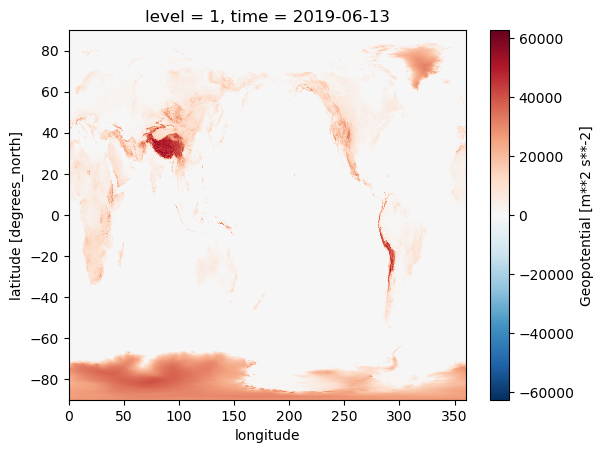

In [9]:
ds.z.isel(time=0, level=0).plot.imshow()